# Лабораторная 4 - классификация, Фида А.Д. 6135

Датасет для многоклассовой классификации: https://www.kaggle.com/uciml/zoo-animal-classification

This dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals.
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.
It is the perfect dataset for those who are new to learning Machine Learning.


- animal_name: Unique for each instance
- hair Boolean
- feathers Boolean
- eggs Boolean
- milk Boolean
- airborne Boolean
- aquatic Boolean
- predator Boolean
- toothed Boolean
- backbone Boolean
- breathes Boolean
- venomous Boolean
- fins Boolean
- legs Numeric (set of values: {0,2,4,5,6,8})
- tail Boolean
- domestic Boolean
- catsize Boolean
- class_type Numeric (integer values in range [1,7])

Датасет для бинарной классификации: https://www.kaggle.com/ronitf/heart-disease-uci

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Для классификации использовал лог регрессию и дерево решений.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn, sklearn.model_selection, sklearn.tree, sklearn.metrics, sklearn.ensemble
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## 1. Многоклассовая классификация

Датасет с разными животными и их признаками (есть ли волосяное покрытие, несут ли яйца, сколько ног и т.д.)

Не очень сбалансированный, много млекопитающих, всего 4 амфибии. 

In [10]:
df = pd.read_csv('data/zoo.csv')
df.head()

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3           1  
4           1

In [11]:
classes = pd.read_csv('data/class.csv')
classes.head()

Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 20       Bird   
2             3                                  5    Reptile   
3             4                                 13       Fish   
4             5                                  4  Amphibian   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad

In [12]:
# выделили целевой вектор и убрали лишние колонки из фрейма
target = df['class_type']
df = df.drop(columns=['animal_name', 'class_type'])
df.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1

In [17]:
set(target)

{1, 2, 3, 4, 5, 6, 7}

#### 1.1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, target, test_size=0.3)

In [14]:
tree_clf = sklearn.tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = tree_clf.predict(X_test)

In [16]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.9354838709677419

### 1.2. То же самое с использованием кросс-валидации

In [20]:
tree_cross_clf = sklearn.tree.DecisionTreeClassifier()
scores = sklearn.model_selection.cross_val_score(tree_cross_clf, df, target, scoring='accuracy', cv=3)
scores

array([0.97058824, 0.97058824, 0.90909091])

In [21]:
scores.mean()

0.9500891265597148

### 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

В качестве параметра для изменения был выбран min_samples_leaf - минимальное количество объектов, которые должны находиться в наименьшем листе дерева.
Чем больше параметр min_samples_leaf, тем меньше разбиений будет производиться. 
По графику видно, что при данном параметре больше некоторого числа параметр accuracy достигает своего значения, соответствующего случайной классификации (достигаем так называемый уровень рандома).

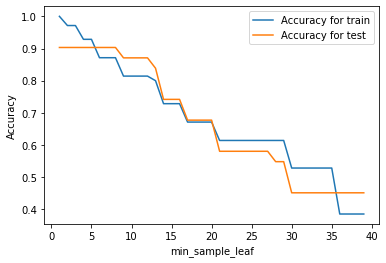

In [22]:
training_accuracy = []
test_accuracy = []

leaves = range(1, 40)
for i in leaves:
    tree_clf = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=i)
    tree_clf.fit(X_train, y_train)
    training_accuracy.append(tree_clf.score(X_train, y_train))
    test_accuracy.append(tree_clf.score(X_test, y_test))
    
plt.plot(leaves, training_accuracy, label="Accuracy for train")
plt.plot(leaves, test_accuracy, label="Accuracy for test")
plt.ylabel("Accuracy")
plt.xlabel("min_sample_leaf")
plt.legend()    

### 1.4 Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). 

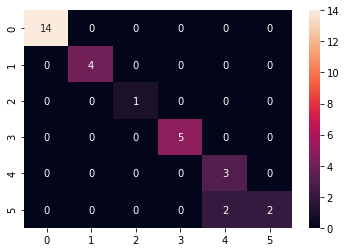

In [41]:
confusion_scores = sklearn.metrics.confusion_matrix(y_test, y_pred)
# confusion_df = pd.DataFrame(confusion_scores, columns=y_test, index=y_pred)
sns.heatmap(confusion_scores, annot=True);

## 2. Бинарная классификация

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

Датасет с набором параметров (возраст, давление, холестерин и т.д.) и их связью с наличием сердечно-сосудистых заболеваний. 
Этот датасет использовался в третьей лабораторной работе.

In [85]:
bin_df = pd.read_csv('data/heart.csv')
bin_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [86]:
bin_target = bin_df['target']
bin_df = bin_df.drop(columns=['target'])

In [87]:
bin_X_train, bin_X_test, bin_y_train, bin_y_test = sklearn.model_selection.train_test_split(bin_df, bin_target, test_size = 0.3)

In [88]:
logreg = LogisticRegression(C=2)
logreg.fit(bin_X_train, bin_y_train)

c:\users\aleksandr_fida\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2)

In [89]:
bin_y_pred = logreg.predict(bin_X_test)

In [90]:
sklearn.metrics.accuracy_score(bin_y_test, bin_y_pred)

0.8461538461538461

In [91]:
sklearn.metrics.recall_score(bin_y_test, bin_y_pred)

0.8727272727272727

In [92]:
sklearn.metrics.f1_score(bin_y_test, bin_y_pred)

0.8727272727272727

In [93]:
print(sklearn.metrics.classification_report(bin_y_test, bin_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.87      0.87      0.87        55

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



В зависимости от специфики задачи, имеет смысл подбирать гиперпараметры моделей таким образом, чтобы максимизировать предпочтительную метрику (например, в задачах определения болезней предпочтительней максимизировать recall, т.к. желательно не пропускать больных людей, т.е. уменьшать FN)

## Боунс: PR кривая и F1

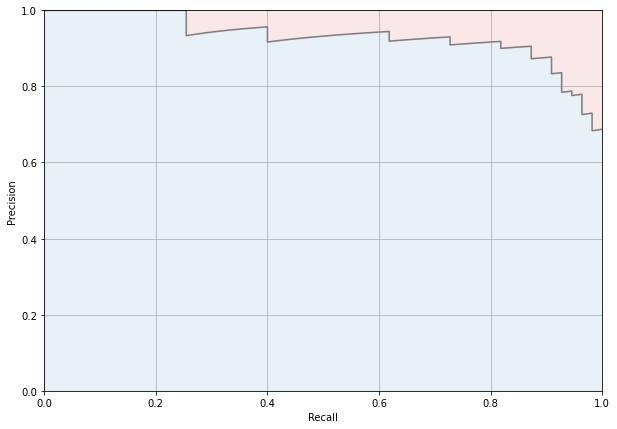

In [102]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


y_pred_proba = logreg.predict_proba(bin_X_test)
y_pred_proba = list(map(lambda x: x[1], y_pred_proba))
precision, recall, threshold = precision_recall_curve(bin_y_test, y_pred_proba)

f1 = [2 * (p * r) / (p + r) for p, r in zip(precision, recall)]

plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(recall, precision, color='tab:gray')
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.fill_between(x=recall, y1=precision, color='tab:blue', alpha=0.1)
plt.fill_between(x=recall, y1=precision, y2=1.0, color='tab:red', alpha=0.1)

plt.xlim(0, 1.0)
plt.ylim(0, 1.0);

Максимальное значение f1 меры: 0.893 достигается при значении трешолда: 0.896


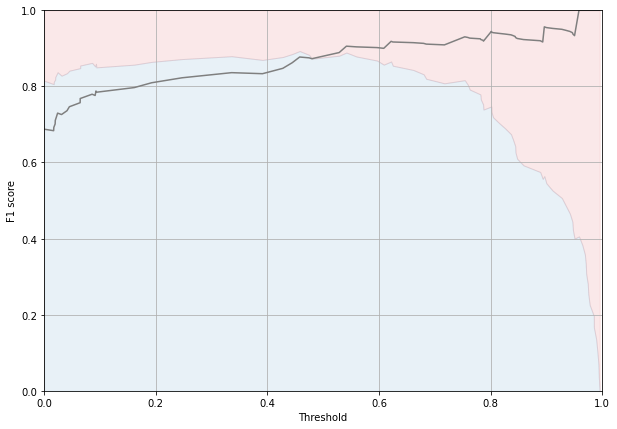

In [125]:
ext = [0] + threshold.tolist()

print(f"Максимальное значение f1 меры: {round(max(f1), 3)} достигается при значении трешолда: {round(ext[::-1][np.argmax(f1)], 3)}")
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(ext, precision, color='tab:gray')
plt.grid(True)
plt.xlabel('Threshold')
plt.ylabel('F1 score')

plt.fill_between(x=ext, y1=f1, color='tab:blue', alpha=0.1)
plt.fill_between(x=ext, y1=f1, y2=1.0, color='tab:red', alpha=0.1)

plt.xlim(0, 1.0)
plt.ylim(0, 1.0);

## Выводы

На многоклассовой классификации решающее дерево показало себя не с лучше стороны, но на другом датасете линейная регрессия отработала хорошо